In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

Mounted at /content/drive


In [4]:
#Read stock prices data
stock = pd.read_csv("stock_.csv")
stock.head()

Date       AAPL         BA          T    MGM        AMZN         IBM  \
0  2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1  2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2  2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3  2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4  2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000

In [5]:
#Read the stocks volume data
volume = pd.read_csv("stock_volume.csv")
volume.head()

Date      AAPL       BA         T       MGM     AMZN      IBM  \
0  2012-01-12  53146800  3934500  26511100  17891100  5385800  6881000   
1  2012-01-13  56505400  4641100  22096800  16621800  4753500  5279200   
2  2012-01-17  60724300  3700100  23500200  15480800  5644500  6003400   
3  2012-01-18  69197800  4189500  22015000  18387600  7473500  4600600   
4  2012-01-19  65434600  5397300  25524000  14022900  7096000  8567200   

      TSLA      GOOG       sp500  
0   729300   3764400  4019890000  
1  5500400   4631800  3692370000  
2  4651600   3832800  4010490000  
3  1260200   5544000  4096160000  
4  1246300  12657800  4465890000

In [6]:
#Sort the data based on Date
stocks_df = stock.sort_values(by = ["Date"])
#Sort the volume data based on Date
volume_df = volume.sort_values(by = ["Date"])

In [7]:
# Check if Null values exist in stock prices data
stocks_df.isnull().sum()


Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [8]:
# Check if Null values exist in stocks volume data
volume_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

TASK 3

In [9]:
#TASK #3: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION
# Function to normalize stock prices based on their initial price
def normalize(df):
  x = df.copy()
  for j in x.columns[1:]:
    x[j] = x[j]/x[j][0]
  return x
 

In [10]:
normalize(stocks_df )

Date      AAPL        BA         T       MGM       AMZN       IBM  \
0     2012-01-12  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
1     2012-01-13  0.996251  0.987949  0.998340  1.018137   1.014153  0.992301   
2     2012-01-17  1.007855  0.996424  1.004316  1.009893   1.032570  0.996954   
3     2012-01-18  1.018320  0.994040  1.006972  1.049464   1.076792  1.002880   
4     2012-01-19  1.015093  1.000662  1.009960  1.055235   1.105269  0.999834   
...          ...       ...       ...       ...       ...        ...       ...   
2154  2020-08-05  7.313297  2.308039  0.991036  1.378401  18.217644  0.694821   
2155  2020-08-06  7.568452  2.280493  0.990704  1.521847  18.331155  0.698532   
2156  2020-08-07  7.383066  2.251622  0.996680  1.568838  18.004093  0.692107   
2157  2020-08-10  7.490377  2.375977  1.002656  1.784831  17.894390  0.704016   
2158  2020-08-11  7.267614  2.385512  1.002656  1.772465  17.510772  0.702022   

           TSLA      GOOG     sp500  
0      1.000000  1.000000  1.000000  
1      0.806726  0.992615  0.995052  
2      0.941593  0.998317  0.998587  
3      0.949027  1.005193  1.009680  
4      0.947257  1.015771  1.014666  
...         ...       ...       ...  
2154  52.567080  4.698347  2.568715  
2155  52.728494  4.782805  2.585226  
2156  51.423361  4.764919  2.586862  
2157  50.214865  4.770052  2.593956  
2158  48.650974  4.719740  2.573284  

[2159 rows x 10 columns]

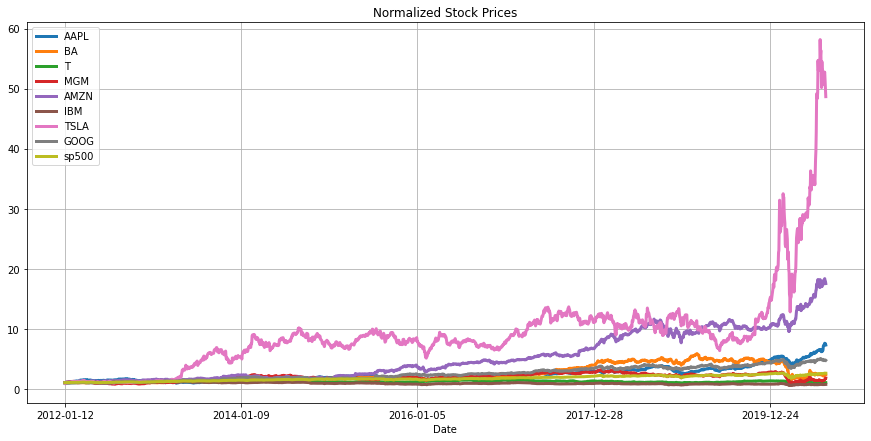

In [12]:
def show_plot(df, fig_title):
  df.plot(x ="Date", figsize = (15, 7), linewidth = 3, title= fig_title)
  plt.grid()
  plt.show()
  
show_plot(normalize(stocks_df), "Normalized Stock Prices")

In [11]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df["Date"], y = df[i], name = i)
  fig.show()

# Plot interactive chart for stocks data
interactive_plot(stocks_df, "Prices")

**TASK 4**

In [12]:
#concatenate the date, stock price, and volume in one dataframe
volume_no_Date = volume.iloc[: , 1:]
rename_volume = volume_no_Date.rename(columns = {'AAPL': 'AAPL_Vol', 'BA': 'BA_Vol', 'T': 'T_Vol','MGM': 'MGM_Vol','AMZN': 'AMZN_Vol','IBM': 'IBM_Vol', 'TSLA': 'TSLA_Vol', 'GOOG': 'GOOG_Vol', 'sp500': 'sp500_Vol'}, inplace = False)
combine = pd.concat([stock, rename_volume], axis=1)
combine.head()

Date       AAPL         BA          T    MGM        AMZN         IBM  \
0  2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1  2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2  2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3  2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4  2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  AAPL_Vol   BA_Vol     T_Vol   MGM_Vol  \
0  28.250000  313.644379  1295.500000  53146800  3934500  26511100  17891100   
1  22.790001  311.328064  1289.089966  56505400  4641100  22096800  16621800   
2  26.600000  313.116364  1293.670044  60724300  3700100  23500200  15480800   
3  26.809999  315.273285  1308.040039  69197800  4189500  22015000  18387600   
4  26.760000  318.590851  1314.500000  65434600  5397300  25524000  14022900   

   AMZN_Vol  IBM_Vol  TSLA_Vol  GOOG_Vol   sp500_Vol  
0   5385800  6881000    729300   3764400  4019890000  
1   4753500  5279200   5500400   4631800  3692370000  
2   5644500  6003400   4651600   3832800  4010490000  
3   7473500  4600600   1260200   5544000  4096160000  
4   7096000  8567200   1246300  12657800  4465890000

In [13]:
# Function to concatenate the date, stock price, and volume in one dataframe
def individual_stock(price_df, vol_df, name):
    return pd.DataFrame({'Date': price_df['Date'], 'Close': price_df[name], 'Volume': vol_df[name]})

In [14]:
# Function to return the input/output (target) data for AI/ML Model
# Note that our goal is to predict the future stock price (given)
# Target stock price today will be tomorrow's price (given)
def trading_window(data):
  n = 1
  data['Target'] = data[['Close']].shift(-n)
  return data

In [16]:
price_volume_df = individual_stock(stocks_df, volume_df, 'AAPL')
price_volume_df.head()

Date      Close    Volume
0  2012-01-12  60.198570  53146800
1  2012-01-13  59.972858  56505400
2  2012-01-17  60.671429  60724300
3  2012-01-18  61.301430  69197800
4  2012-01-19  61.107143  65434600

In [17]:
price_volume_target = trading_window(price_volume_df)
price_volume_target.head()

# Removing the last row as it will be a null value
price_volume_target_df = price_volume_target.iloc[:-1]
price_volume_target_df.head()

Date      Close    Volume     Target
0  2012-01-12  60.198570  53146800  59.972858
1  2012-01-13  59.972858  56505400  60.671429
2  2012-01-17  60.671429  60724300  61.301430
3  2012-01-18  61.301430  69197800  61.107143
4  2012-01-19  61.107143  65434600  60.042858

In [18]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))
price_volume_target_scaled_df

array([[0.01102638, 0.11442624, 0.01046185],
       [0.01046185, 0.12362365, 0.01220906],
       [0.01220906, 0.13517696, 0.01378478],
       ...,
       [1.        , 0.10747163, 0.97208751],
       [0.97208751, 0.10431171, 0.98824476],
       [0.98824476, 0.11430054, 0.95470465]])

In [19]:
# Creating Feature and Target
x = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]
x.shape, y.shape

((2158, 2), (2158, 1))

In [44]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.70 * len(X))
x_train = x[:split]
y_train = y[:split]
x_test = x[split:]
y_test = y[split:]

In [47]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1511, 2), (1511, 1), (647, 2), (647, 1))

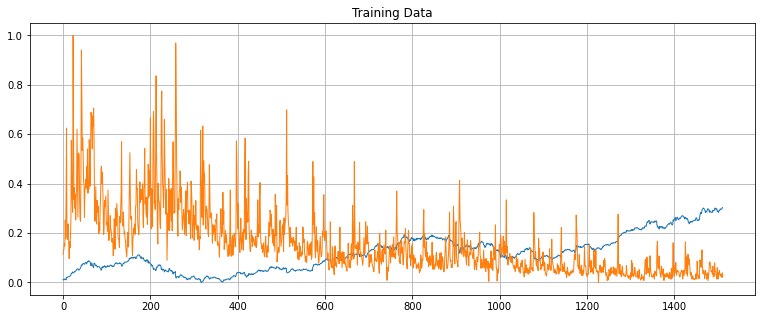

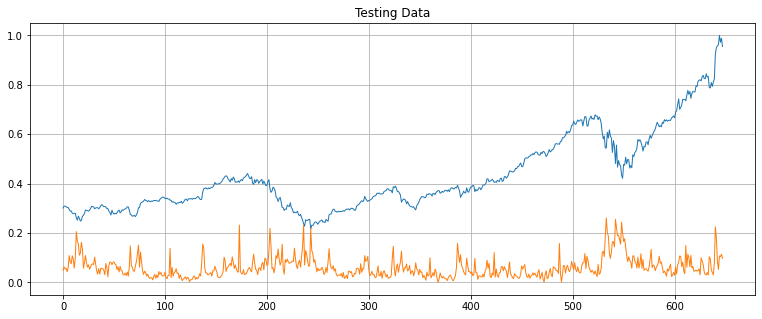

In [48]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 1)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

**TASK #7: BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL**

In [49]:
from sklearn.linear_model import Ridge
regression_model = Ridge()
regression_model.fit(x_train, y_train)

Ridge()

In [50]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(x_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.8860572403888334


In [52]:
# Make Prediction
predicted_prices = regression_model.predict(x)
predicted_prices

array([[0.02991381],
       [0.02901603],
       [0.02996472],
       ...,
       [0.86624356],
       [0.84279271],
       [0.85599421]])

In [54]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

len(Predicted)

2158

In [55]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [56]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted.head()

Date
0  2012-01-12
1  2012-01-13
2  2012-01-17
3  2012-01-18
4  2012-01-19

In [58]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted.head()

Date     Close
0  2012-01-12  0.011026
1  2012-01-13  0.010462
2  2012-01-17  0.012209
3  2012-01-18  0.013785
4  2012-01-19  0.013299

In [59]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted.head()

Date     Close  Prediction
0  2012-01-12  0.011026    0.029914
1  2012-01-13  0.010462    0.029016
2  2012-01-17  0.012209    0.029965
3  2012-01-18  0.013785    0.030236
4  2012-01-19  0.013299    0.030296

In [60]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

**TASK #12: TRAIN AN LSTM TIME SERIES MODEL**

In [63]:
# Let's test the functions and get individual stock prices and volumes for AAPL
price_volume_df = individual_stock(stocks_df, volume_df, 'AAPL')
price_volume_df.head()

Date      Close    Volume
0  2012-01-12  60.198570  53146800
1  2012-01-13  59.972858  56505400
2  2012-01-17  60.671429  60724300
3  2012-01-18  61.301430  69197800
4  2012-01-19  61.107143  65434600

In [64]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[6.01985700e+01, 5.31468000e+07],
       [5.99728580e+01, 5.65054000e+07],
       [6.06714290e+01, 6.07243000e+07],
       ...,
       [4.44450012e+02, 4.94533000e+07],
       [4.50910004e+02, 5.31009000e+07],
       [4.37500000e+02, 4.68711000e+07]])

In [65]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)


In [66]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [67]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [68]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [69]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((1510, 1, 1), (648, 1, 1))

In [70]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(50, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(50, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(50)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 50)             10400     
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 50)             20200     
                                                                 
 dropout_1 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51    

In [71]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs = 100,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/100
38/38 [==============================] - 8s 40ms/step - loss: 0.0045 - val_loss: 0.0150
Epoch 2/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.0149
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0117
Epoch 4/100
38/38 [==============================] - 0s 6ms/step - loss: 8.6135e-04 - val_loss: 4.0610e-04
Epoch 5/100
38/38 [==============================] - 0s 6ms/step - loss: 1.1707e-04 - val_loss: 2.9920e-05
Epoch 6/100
38/38 [==============================] - 0s 6ms/step - loss: 9.0563e-05 - val_loss: 2.5009e-05
Epoch 7/100
38/38 [==============================] - 0s 6ms/step - loss: 8.2675e-05 - val_loss: 2.1353e-05
Epoch 8/100
38/38 [==============================] - 0s 6ms/step - loss: 7.7442e-05 - val_loss: 4.0321e-05
Epoch 9/100
38/38 [==============================] - 0s 7ms/step - loss: 7.8233e-05 - val_loss: 2.2347e-05
Epoch 10/100
38/38 [==============================] - 0s 6ms

In [73]:
# Make prediction
predicted = model.predict(X)
predicted

array([[0.01111788],
       [0.01056379],
       [0.01227865],
       ...,
       [0.78405887],
       [0.77047116],
       [0.7783955 ]], dtype=float32)